# Pokemon-Visualization Challenge
### Gotta catch 'em all!
In this notebook I am going to train my visualization and notebook creation skills.
I will use a provided CSV file with lots of data from the pokemon universe and explore the depths and relationships of it using matplotliib

In [3]:
# importing libraries
#pandas for datahandling
import pandas as pd
#matplotlib/pyplot for more beautiful visuals
from matplotlib import pyplot as plt
%matplotlib inline
#seaborn for stylish plots
import seaborn as sns

### importing the file as df, defining the first column as index
***

In [15]:
#importing the file as df, defining the first column as index
df = pd.read_csv('Pokemon.csv', index_col=0)

In [16]:
# check if everything looks good and if we need normalisation
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


The first thing i want to look at is the Attack vs Defense stats of the Pokemon

***

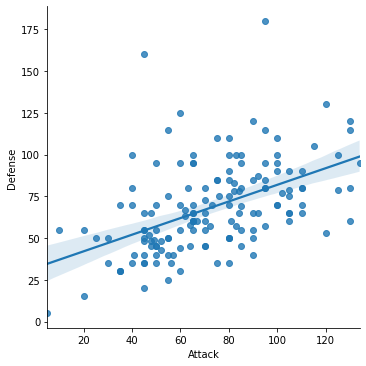

In [18]:
sns.lmplot(x='Attack', y="Defense", data=df);

Lets customize this graph, so that we get rid of the regression line, and also color the plots by evolution stage of the Pokemon
***


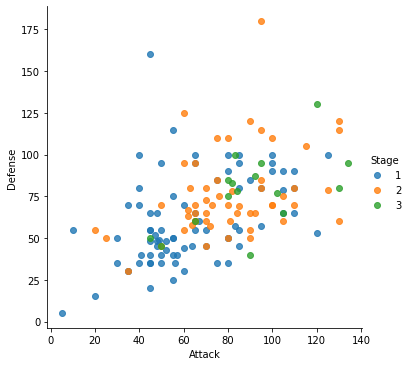

In [24]:
sns.lmplot(x='Attack', y="Defense", data=df,
          fit_reg=False, # remove regression line
          hue="Stage"); # color the plots by the stage

Tweaking slightly with matplotlib
***

(3.0, 140.45)

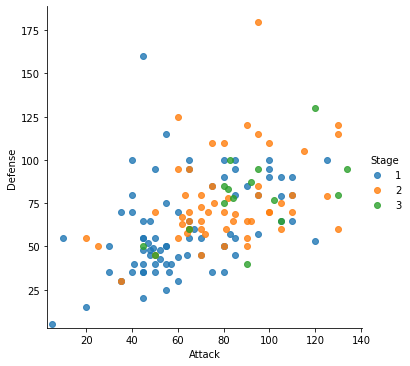

In [58]:
sns.lmplot(x="Attack", y="Defense", data=df,
           fit_reg = False,
           hue="Stage");
plt.ylim(3,None) # fit y axes to start with 3
plt.xlim(3,None) #fit x axis to start with 3

Let's take a look at how the combat stats are distributed
***


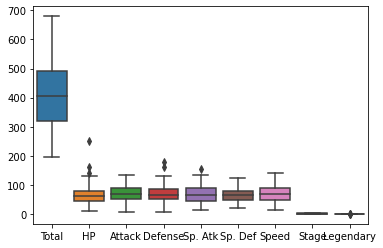

In [60]:
# Create a boxplot
sns.boxplot(data=df);


That looks okay, but the total column distorts our view of the individual stats and "Stage" and "Legendary" arent combat stats.
I will create a new dataframe where I drop the columns and visualize this again
***

In [63]:
combat=df.drop(['Total','Stage','Legendary'], axis=1)

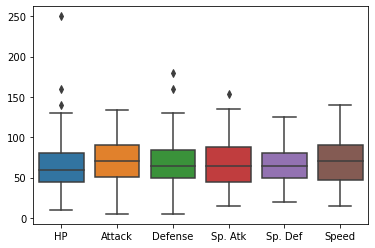

In [65]:
sns.boxplot(data=combat);


We will now take a look at how Attack points are distributed between different types
***

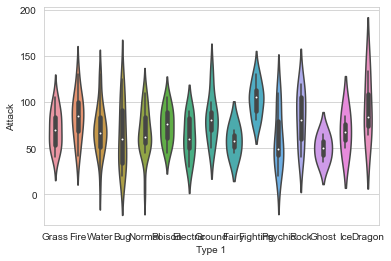

In [70]:
#set the theme
sns.set_style('whitegrid')
#violin plot
sns.violinplot(x='Type 1', y='Attack', data=df);



In [71]:
# we now set the colors of the violin according to the type they reflect
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

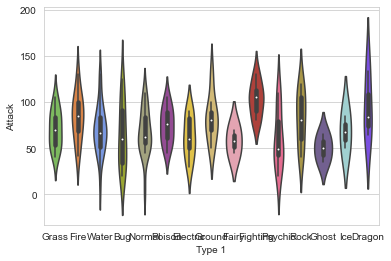

In [74]:
sns.violinplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors);

Next we create a swarmplot of how Attackpower is distributed over types
***

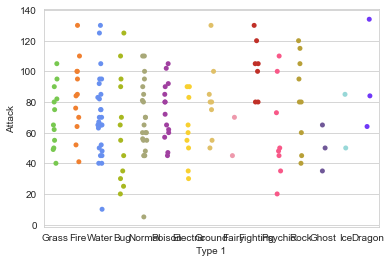

In [111]:
# Swarm plot with Pokemon color palette
sns.stripplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors);



Let's take a look at the relationship between Type-distribution and Attackpower bvy overlaying the two charts
***

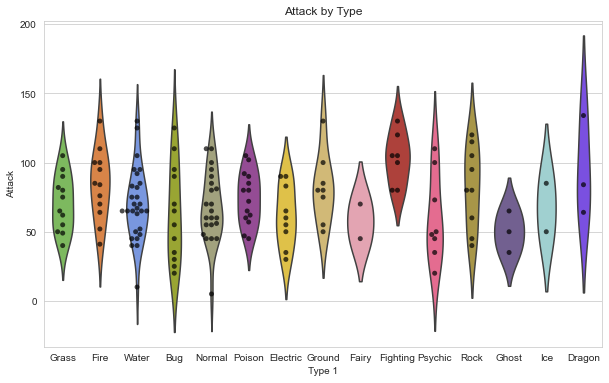

In [114]:
# Overlaying swarm and violin plotsPython
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors);
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7); # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type');

Net step is to prepare the table for some more charts. For that, I will melt the tables to combine multiple information in one field, and more rows, so we can easily acces it.
***

In [117]:
# Melt DataFrame
melted_df = pd.melt(combat, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head(10)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
5,Charizard,Fire,Flying,HP,78
6,Squirtle,Water,NaN,HP,44
7,Wartortle,Water,NaN,HP,59
8,Blastoise,Water,NaN,HP,79
9,Caterpie,Bug,NaN,HP,45


In [83]:
# Shape comparison with Python
print( combat.shape )
print( melted_df.shape )



(151, 9)
(906, 5)


Here is the new combined table of all types and their combat stats
***

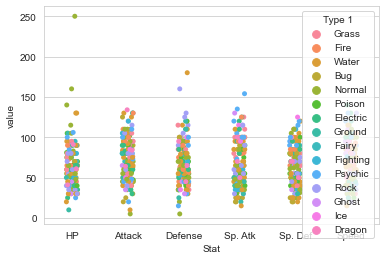

In [119]:
# Swarmplot with melted_df
sns.stripplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1');

We make it bigger to make it more plasureable to read:

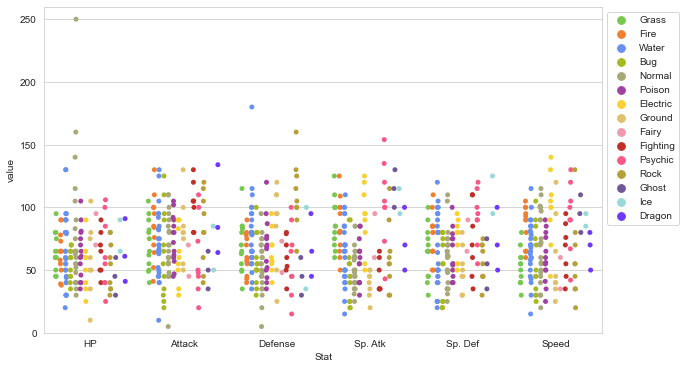

In [122]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6));
 
sns.stripplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors); # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260);
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2);

Next we create a mini Pokedex that is a heatmap of those valuesand shows correlation between them
***

<AxesSubplot:>

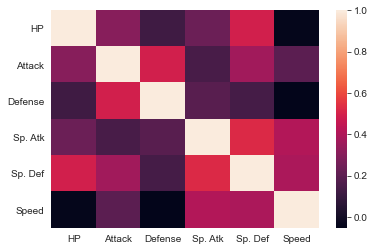

In [97]:
#HeatmapPython
# Calculate correlations
corr = combat.corr()
 
# Heatmap
sns.heatmap(corr)

Now the distribution of attack-power:
***

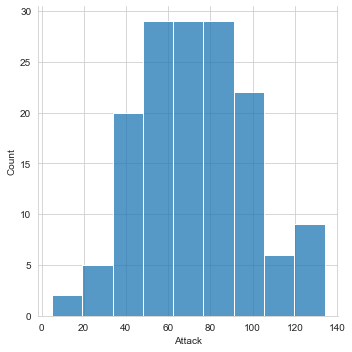

In [99]:
#HistogramPython
# Distribution Plot (a.k.a. Histogram)
sns.displot(df.Attack)

And lets now have a final look at the number of types and how they're distributed
***

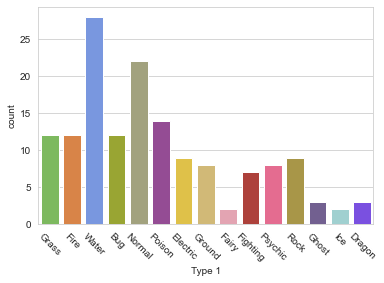

In [123]:
#Bar PlotPython

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45);

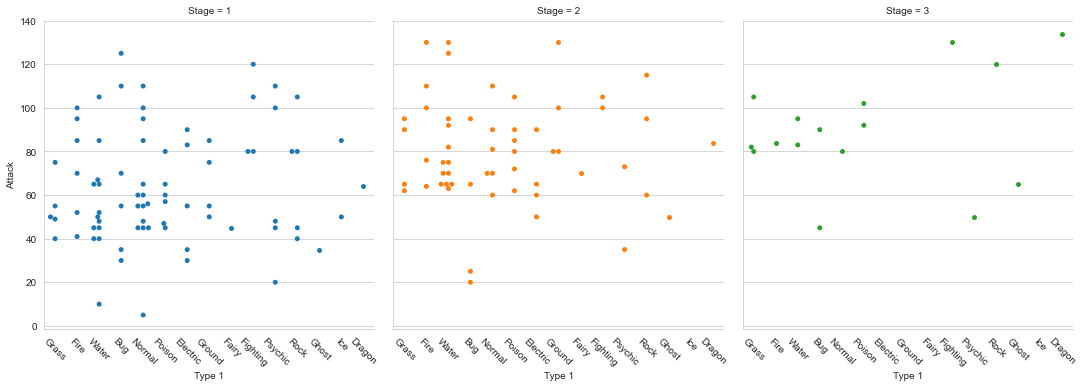

In [103]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45);
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

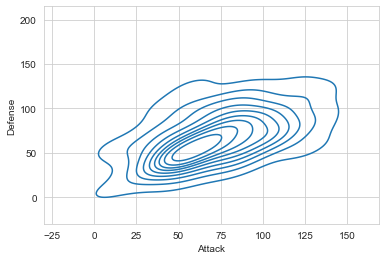

In [105]:
# Density Plot
sns.kdeplot(x=df.Attack, y=df.Defense);

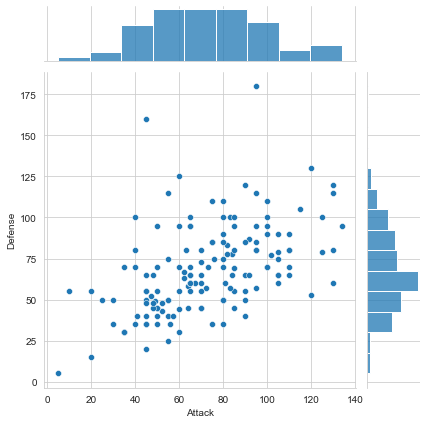

In [107]:
#Joint Distribution PlotPython

# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df);